# Data cleaning and merging dataframes

## Loading multiple datasets

### Google way

In [251]:
import pandas as pd

# orderlines.csv
url = 'https://drive.google.com/file/d/14Y7g5ITyf6LMyPoKc9wr010V9StaCUux/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders.csv
url = 'https://drive.google.com/file/d/1BLEHcP-9fm9Rv7A01H3co2XBMnSr66YC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands.csv
url = 'https://drive.google.com/file/d/1BrNrIY0F1LbyXtyaQygUBXVxQGB3JBqx/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products.csv
url = 'https://drive.google.com/file/d/1UfsHI80cpQqGfsH2g4T4Tsw8cWayOfzC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

df_list = [orderlines, orders, brands, products]
files = ['orderlines','orders','brands','products']

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

### Classical way

Reading file by file

In [252]:
# import pandas as pd

# path = '../data/eniac/'
# orderlines = pd.read_csv(path + 'orderlines.csv')
# orders = pd.read_csv(path + 'orders.csv')
# brands = pd.read_csv(path + 'brands.csv')
# products = pd.read_csv(path + 'products.csv')

# df_list = [orderlines, orders, brands, products]
# files = ['orderlines','orders','brands','products']

### Another way

Using `os` and a loop to read all the files from a directory. It's also possible to read only files with a certain extension (like `.csv`):

In [253]:
# import pandas as pd
# import os
# path = '../data/eniac/'
# path, dirs, files = next(os.walk(path))
# #print(files)

# # remove non-csv files
# for file in files:
#     if not file.endswith("csv"):
#         files.remove(file)

In [254]:
# # create empty list 
# df_list = []

# # append datasets to the list
# for file in files:
#     temp_df = pd.read_csv(path + file, sep=',')
#     df_list.append(temp_df)

# # show results
# products, orders, orderlines, brands = df_list[0], df_list[1], df_list[2], df_list[3]

## Data quality

### Missing values

In [255]:
# we can check missing values column
orderlines.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

In [256]:
# or for the whole dataframe
orderlines.isna().sum().sum()

0

In [257]:
orders.isna().sum()

order_id        0
created_date    0
total_paid      5
state           0
dtype: int64

In [258]:
# the .info() method also tells us the "Non-Null Count" for each column
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [259]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [260]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [261]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [262]:
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


### Duplicates

The presence of duplicate rows is generally a sign that the data is not clean, and will deserve further exploration.

In [263]:
orderlines.duplicated().sum()

0

In [264]:
orders.duplicated().sum()

0

In [265]:
brands.duplicated().sum()

0

In [266]:
products.duplicated().sum()

8746

### Data cleanliness - initial assessment

Based on our initial exploration, we know we will need to deal with some missing values. The biggest issue so far are the duplicates on the `products` DataFrame. Here are some aspects that we will need to fix or, at least, explore further:

* **products**: 
    * `price` and `promo_price` are loaded as objects. They should be floats. 
    * Missing values: 
        * `description`: 7 missing values. Maybe that could be inferred from the product name?
        * `price`: the missing values could be filled from the `orderlines` dataset. But first we will need to clean it. 
    * Duplicates: a total of 8746 duplicates seems to indicate this DataFrame has been seriously corrupted.
    
* **orders**: 
    * `created_date` should have a date data type. Then, it would be a good quality check to see if the created date for `orders` mathces with the created dates for `orderlines`. 
    
* **orderlines**: 
    * `unit_price` has to be a float, something is wrong there. 
    * `date` has to be transformed to a date data type. Then, as we said, check that it with matches with the `orders` dataset. 
    
* **brands**: looks fine. 

Where do we have to start? 

1. **Data consistency:** Since `orders` and `orderlines` seem very crucial to the analysis, we will start by cleaning them and checking that the information present in both DataFrames match.

2. **The "products mess":** This file seems to have many issues. We will leave it out for now and perform a proper exploration later to understand better what's going on there.

## Cleaning orders

The data consistency check we will do with `orderlines` will involve two steps: 

* the initial and last dates of the orders should be the same
* the sum of `total_paid` on both datasets should be the same

Let's start by transforming the `created_date` of the orders DataFrame and looking for its earliest and latest values:

In [267]:
# change date datatype
orders['created_date'] = pd.to_datetime(orders['created_date'])

In [268]:
# earliest value
min(orders['created_date'])

Timestamp('2017-01-01 00:07:19')

In [269]:
# latest value
max(orders['created_date'])

Timestamp('2018-03-14 13:58:36')

Now we will look at the overall sum of `total_paid` for the orders table:

In [270]:
sum(orders['total_paid'])

nan

Why do you think the result of the sum is a nan (not a number)?

In [271]:
orders["total_paid"].isna().sum()

5

There are missing values! We can explore them and see how they are all "Pending" orders:

In [272]:
orders.loc[orders['total_paid'].isna()]

,order_id,created_date,total_paid,state
127701,427314,2017-11-20 18:54:39,NaN,Pending
132013,431655,2017-11-22 12:15:24,NaN,Pending
147316,447411,2017-11-27 10:32:37,NaN,Pending
148833,448966,2017-11-27 18:54:15,NaN,Pending
149434,449596,2017-11-27 21:52:08,NaN,Pending


Since these orders are only a tiny fraction and there's a valid reason why the `total_paid` value is missing, we will simply exclude them from the dataset:

In [273]:
orders.dropna(inplace=True)

Now the dataset is clean. And the total paid is: 

In [274]:
orders['total_paid'].isna().sum()

0

In [275]:
sum(orders['total_paid'])

129159615.06991275

## Cleaning orderlines

Following our data consistency check, will now gather in the orderlines DataFrame the same information we got from orders:

* the initial and last dates
* the sum of `total_paid`


First let's transform our date time:

In [276]:
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [277]:
min(orderlines['date'])
# orders: Timestamp('2017-01-01 00:07:19')

Timestamp('2017-01-01 00:07:19')

In [278]:
max(orderlines['date'])
# orders: Timestamp('2018-03-14 13:58:36')

Timestamp('2018-03-14 13:58:36')

**It's a match!**

Now let's check the `total_paid` for orderlines. It's not going to be as easy as with the orders DataFrame, considering the sturcture of orderlines:


In [279]:
orderlines.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57



To get this value, we will have to calculate a new column, total price for each row. It would be `product_quantity` * `unit_price`. This operation will require that both columns have a numeric data type:

In [280]:
orderlines.dtypes

id                           int64
id_order                     int64
product_id                   int64
product_quantity             int64
sku                         object
unit_price                  object
date                datetime64[ns]
dtype: object

...it's not the case right now, so we will have to transform the `unit_price` to a numeric data type. 

In [281]:
# uncomment the line of code below and read the error it produces:
#orderlines['product_quantity']*pd.to_numeric(orderlines['unit_price'])

While trying to transform this column to numeric an error appears. From the error message, 

> "Unable to parse string '1.137.99' at position 6"

it seems that our dataset has some problems with the thousands separators: they were encoded as dots, and Python & pandas only admit one dot per number: the _decimal_ separator!

Lesson learned: do not use thousand separators in databases / statistical software / programming languages! Sadly, it's too late for us, and we will have to deal with the issue.

There are many ways to approach this problem. The first thing we will do is to count how many dots appear for each `unit_price` value, using string operations. If there are two or more dots a value, we will consider it corrupted —and either try to fix it, or remove it completely.

In [282]:
# we create a copy of the dataset
ol_temp = orderlines.copy()

# create a new column with the amount of dots in the unit_price column
ol_temp['dots'] = orderlines['unit_price'].str.count('\.') # the backslash 'escapes' the special meaning of '.' in string operations

# show the rows with more than one dot
ol_temp.query('dots > 1')

,id,id_order,product_id,product_quantity,sku,unit_price,date,dots
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21,2
11,1119126,299549,0,1,PAC0929,2.565.99,2017-01-01 02:07:42,2
15,1119131,299553,0,1,APP1854,3.278.99,2017-01-01 02:14:47,2
43,1119195,299582,0,1,PAC0961,2.616.99,2017-01-01 08:54:00,2
59,1119214,299596,0,1,PAC1599,2.873.99,2017-01-01 09:53:11,2
...,...,...,...,...,...,...,...,...
293862,1649999,452946,0,1,APP2075,2.999.00,2018-03-14 13:03:33,2
293887,1650045,527321,0,1,PAC2148,3.497.00,2018-03-14 13:10:15,2
293889,1650050,527324,0,1,PAC2117,3.075.00,2018-03-14 13:10:56,2
293911,1650088,527342,0,1,APP2492,1.329.00,2018-03-14 13:24:51,2


Our theory about the thousands separators is confirmed. How can we solve this problem? 

Let's remove all the dots for all the `unit_price`, and then add a dot before the last 2 digits to all the rows. Then we will transform it into numeric values.

##### step 1: remove all dots
a) A "corrupted" price like `1.137.99`	will become `113799`

b) A correct price like `37.99`	will become `3799`

##### step 2: add dots two digits before the end of the number
a) The "corrupted" price will go from `113799` to `1137.99`

b) The correct price will go from `3799` back to `37.99`.

In [283]:
# step 1: to remove the dots, we replace them for... nothing
orderlines = orderlines.assign(unit_price_nd = orderlines['unit_price'].str.replace('\.','', regex=True))
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_nd
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,1899
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,39900
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,47405
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,6839
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2374


In [284]:
# step 2.1: we first separate all numbers between the part that goes before the
# decimal point (integers) and the part that goes afterwards (deimals)
orderlines['integers'] = orderlines['unit_price_nd'].str[:-2]
orderlines['decimals'] = orderlines['unit_price_nd'].str[-2:]
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_nd,integers,decimals
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,1899,18,99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,39900,399,00
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,47405,474,05
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,6839,68,39
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2374,23,74


In [285]:
# step 2.2: we now concatenate those two parts of the number, with a dot in between
orderlines['new_unit_price'] = orderlines['integers'] + '.' + orderlines['decimals']
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_nd,integers,decimals,new_unit_price
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,1899,18,99,18.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,39900,399,00,399.00
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,47405,474,05,474.05
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,6839,68,39,68.39
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2374,23,74,23.74


We will now try again to convert this column to a numeric data type:

In [286]:
orderlines['unit_price'] = pd.to_numeric(orderlines['new_unit_price'])
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  float64       
 6   date              293983 non-null  datetime64[ns]
 7   unit_price_nd     293983 non-null  object        
 8   integers          293983 non-null  object        
 9   decimals          293983 non-null  object        
 10  new_unit_price    293983 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 24.7+ MB


Data cleaning done! 

Back to data consistency: Now it is time to multiply `product_quantity` and `unit price`, sum all the rows and check whether the value matches the sum of the `total_paid` from the orders DataFrame: 

In [287]:
# drop 'auxiliary' columns
orderlines.drop(['unit_price_nd','decimals','integers','new_unit_price'], axis=1, inplace=True)

# create a new column "total_price" by multiplying product_quantity times unit_price
orderlines['total_price'] = orderlines['product_quantity'] * orderlines['unit_price']

# sum of the new column "total_price":
sum(orderlines['total_price'])

128776222.0298095

Sadly, it does not match exactly with the sum of `total_paid` from orders:

In [288]:
orders['total_paid'].sum()

129159615.07000001

The mismatch is about 383 thousand dollars, a non-neglegible amount of money:

In [289]:
sum(orderlines['total_price']) - orders['total_paid'].sum()

-383393.040190503

How can we figure out where does the difference come from? 

## Matching `orders` and `orderlines`

It is possible that some orders exist in one dataset but not in the other one. This would be a potential source for this price mismatch. Let's find out!

We first create a new column in the `orderlines` dataset using `assign`. We also use `isin()` to create a boolen value (True/False) that checks whether the `id_order` is present in the `orders` dataset:

In [290]:
new_df=orderlines.assign(check_orders = orderlines['id_order'].isin(orders['order_id']))
new_df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True


In [291]:
orderlines["check_orders"]=orderlines['id_order'].isin(orders['order_id'])
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True


Then, using `.query` we select rows where the value in this new column is `False`:

In [292]:
new_df.query("check_orders==False").count()

id                  240
id_order            240
product_id          240
product_quantity    240
sku                 240
unit_price          240
date                240
total_price         240
check_orders        240
dtype: int64

It looks like 240 rows in `orderlines` come from orders not present in the `orders` dataset. This is quite inconsistent, since the `orders` dataset should be the one and only source of truth for orders: if an order is not there, it should not exist. We will definitely report this anomaly, but for now, let's just remove those "ghost" orders:

In [293]:
orderlines = (orderlines
              .assign(check_orders = orderlines['id_order'].isin(orders['order_id']))
              .query("check_orders==True"))

In [294]:
# check of order id on orderlines exists on orders
#(
#pd.DataFrame(orderlines["id_order"])
 #   .rename(columns={"id_order":"order_id"})
  #  .assign(is_in_orders = lambda x: x["order_id"].isin(orders["order_id"]))
   # .query("is_in_orders == False")
#).shape[0]

Now let's look at this problem in the opposite direction: are there orders in the `orders` dataset not prsent in `orderlines`?

In [295]:
(orders
 .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
 .query("check_orders==False")).count()

order_id        22213
created_date    22213
total_paid      22213
state           22213
check_orders    22213
dtype: int64

In [296]:
#other solution
#(
#orders["order_id"]
 #   .rename(columns={"order_id":"id_order"})
  #  .assign(is_in_orderlines = lambda x: x["id_order"].isin(orderlines["id_order"]))
   # .query("is_in_orderlines == False")
#).shape[0]

There are more than 22000 orders in the `orders` dataset that are not present on the `orderlines` dataset!!! We can try to find out why by looking at the state of these orders:

In [297]:
(orders.assign(check_orders = orders['order_id']
      .isin(orderlines['id_order']))
      .query("check_orders==False")
      ['state'].value_counts())

Place Order        12304
Shopping Basket     9810
Completed             45
Cancelled             41
Pending               13
Name: state, dtype: int64

It looks like most of them are orders that were not fully completed: the products were left in the shopping basket or the order was "placed" but maybe not paid (hence the state "Place Order". Some of them were "Completed", though. 

This will require further research, and we might have to come back to these orders if we have to explore consumer behaviour (e.g. why are orders left in the shopping basket?), but for now, for the sake of data consistency, let's drop all of these unmatched orders:

In [298]:
orders = (orders
          .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
          .query("check_orders==True")
         )

Let's now check again if the total paid matches:

In [299]:
orders['total_paid'].sum()

129130877.18

In [300]:
orderlines['total_price'].sum()

128659393.77

STILL NOT MATCHING!!! And actually, the difference got larger. This is outrageous. Let's keep exploring.

In [301]:
orderlines['total_price'].sum() - orders['total_paid'].sum()

-471483.4100000113

## Solving the price mismatch

Let's merge both datasets and compare, order by order, the `total_price`. We will call this new merged dataset `orders_info`.

*Note: Remember that the `orderlines` dataset contains one row per product bought: an order where 3 different products were purchased will result in 3 rows there. Therefore, to merge `orderlines` with `orders`, we have to group `orderlines` by its `id_order` and aggregate it by taking the sum of the `total_price`.

In [302]:
orders_info = (
orderlines
    .groupby('id_order')
    .agg({'total_price':'sum'})
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .copy()
)
orders_info.filter(['id_order', 'total_price', 'total_paid'])

,total_price,total_paid
0,44.99,44.99
1,129.16,136.15
2,10.77,15.76
3,77.99,84.98
4,153.87,157.86
...,...,...
204686,42.99,42.99
204687,42.99,42.99
204688,141.58,141.58
204689,19.98,19.98


In [303]:
orderlines.rename(columns={'id_order':'order_id'}, 
                   inplace=True)
orderlines

,id,order_id,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True
...,...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True


In [304]:
merged_orders = pd.merge(orderlines, orders, on='order_id', how='outer')
merged_orders
merged_orders.head(30)

,id,order_id,product_id,product_quantity,sku,unit_price,date,total_price,check_orders_x,created_date,total_paid,state,check_orders_y
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True,2017-01-01 00:07:19,18.99,Shopping Basket,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True,2017-01-01 00:19:45,399.00,Shopping Basket,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True,2017-01-01 00:20:57,474.05,Shopping Basket,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True,2017-01-01 00:51:40,68.39,Shopping Basket,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True,2017-01-01 01:06:38,23.74,Shopping Basket,True
5,1119115,299544,0,1,APP1582,1137.99,2017-01-01 01:17:21,1137.99,True,2017-01-01 01:17:21,1137.99,Shopping Basket,True
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,True,2017-01-01 01:51:47,51.48,Completed,True
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,True,2017-01-01 01:57:34,18.99,Completed,True
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,True,2017-01-01 02:02:38,72.19,Completed,True
9,1119125,299548,0,5,SPE0132,35.14,2017-01-01 02:02:20,175.70,True,2017-01-01 02:02:20,175.70,Shopping Basket,True


Now that the `total` from both datasets is in the same dataframe, we can create a new column with the difference:

In [305]:
orders_info['price_difference'] = orders_info['total_price'] - orders_info['total_paid']
orders_info.sort_values('price_difference').head(30)

,total_price,order_id,created_date,total_paid,state,check_orders,price_difference
70971,90.99,376851,2017-07-13 12:58:52,90989.60,Shopping Basket,True,-90898.61
32392,79.98,334803,2017-03-13 20:41:31,79981.00,Shopping Basket,True,-79901.02
119473,42.99,431635,2017-11-22 12:01:15,42988.90,Shopping Basket,True,-42945.91
45740,12.90,349166,2017-04-24 11:40:42,12899.80,Shopping Basket,True,-12886.90
12387,10322.92,313023,2017-01-21 21:12:41,14648.91,Shopping Basket,True,-4325.99
145,84.55,297148,2017-01-01 16:42:24,4069.54,Completed,True,-3984.99
123,66.49,293308,2017-01-01 13:33:43,2635.47,Completed,True,-2568.98
191738,1674.60,512894,2018-02-16 13:25:30,3356.18,Completed,True,-1681.58
10981,1649.99,311490,2017-01-18 11:02:34,3299.98,Shopping Basket,True,-1649.99
188176,1291.60,508825,2018-02-16 11:21:44,2590.18,Completed,True,-1298.58


In [306]:
# how to do it in one line of code:  
"""
(
orderlines
    .groupby(["id_order"])
    .agg(total_price = ("total_price","sum"))
    .reset_index()
    .merge(orders, how="inner", left_on = "id_order", right_on = "order_id")
    .filter(["id_order","total_price","total_paid"])
    .assign(diff = lambda x: x["total_paid"] - x["total_price"])
    # .query("diff < 0.02 & diff > 0")
    # .sum()
    .query("0.02 < diff < 30")
    .sample(10)

)
"""

'\n(\norderlines\n    .groupby(["id_order"])\n    .agg(total_price = ("total_price","sum"))\n    .reset_index()\n    .merge(orders, how="inner", left_on = "id_order", right_on = "order_id")\n    .filter(["id_order","total_price","total_paid"])\n    .assign(diff = lambda x: x["total_paid"] - x["total_price"])\n    # .query("diff < 0.02 & diff > 0")\n    # .sum()\n    .query("0.02 < diff < 30")\n    .sample(10)\n\n)\n'

In [307]:
orders_info['price_difference'].describe()

count   204691.00
mean        -2.30
std        297.46
min     -90898.61
25%         -0.01
50%          0.00
75%          0.00
max      36159.90
Name: price_difference, dtype: float64

Looks like the maximum and minimun price differences are huge: some orders are really corrupted. But we also see from the mean and the quartiles that the price difference is neglegible for most orders.

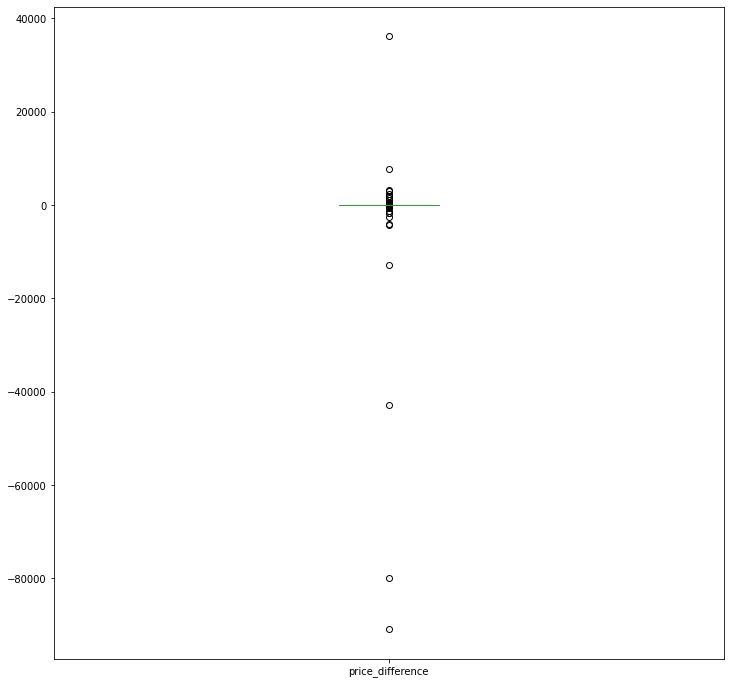

In [308]:
orders_info.boxplot("price_difference",   figsize=(12,12), grid=False)

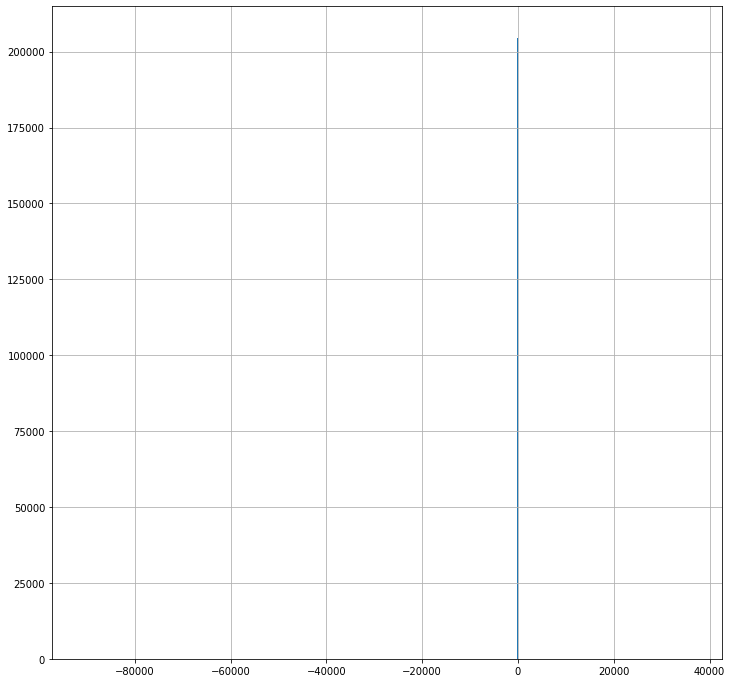

In [309]:
orders_info.price_difference.hist(bins=500, figsize=(12,12));

## Challenge: Remove outliers

Decide on a criteria for removing orders whenever you cannot trust the price difference between `orders` and `orderlines`. 

Note: this solution does not completely achieve 100% trustable data, but the objective here is to end up with the best possible data with a limited amount of time, which makes a complete revision of the database protocols and the data pipelines is not feasable - and business questions are pending. Documenting and reporting this data cleaning process, including the criteria that you will use for determining what do you consider an "outlier", is key. Not being paralized by it is also important!

In [310]:
import numpy as np
q3, q1 = np.percentile(orders_info['price_difference'], [75 ,25])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print(q3)
print(q1)
#print(lower_bound)
#print(upper_bound)
print(iqr)
price_difference_new = orders_info.loc[(orders_info['price_difference'] >= lower_bound) & (orders_info['price_difference'] <= upper_bound)]
price_difference_new.sort_values('price_difference').tail(50)
#price_difference_new.info()
#price_difference_new.info()


#orders = price_difference_new.copy()
#orders.info()
#orders.head(10)

0.0
-0.009999999999990905
0.009999999999990905


,total_price,order_id,created_date,total_paid,state,check_orders,price_difference
195216,2582.99,516775,2018-02-24 12:01:11,2582.98,Shopping Basket,True,0.01
68664,3239.73,374301,2017-07-07 16:58:45,3239.72,Completed,True,0.01
202733,2524.99,525182,2018-03-10 21:51:00,2524.98,Shopping Basket,True,0.01
59084,3578.00,363737,2017-06-08 22:52:57,3577.99,Shopping Basket,True,0.01
181222,2982.59,501004,2018-01-29 13:10:54,2982.58,Shopping Basket,True,0.01
199157,5693.64,521241,2018-03-05 10:35:52,5693.63,Shopping Basket,True,0.01
199206,5163.98,521301,2018-03-05 10:35:59,5163.97,Shopping Basket,True,0.01
57292,2781.93,361765,2017-06-02 17:42:24,2781.92,Shopping Basket,True,0.01
199211,5163.98,521306,2018-03-05 10:36:02,5163.97,Shopping Basket,True,0.01
136299,2507.59,450682,2017-11-28 17:07:32,2507.58,Shopping Basket,True,0.01


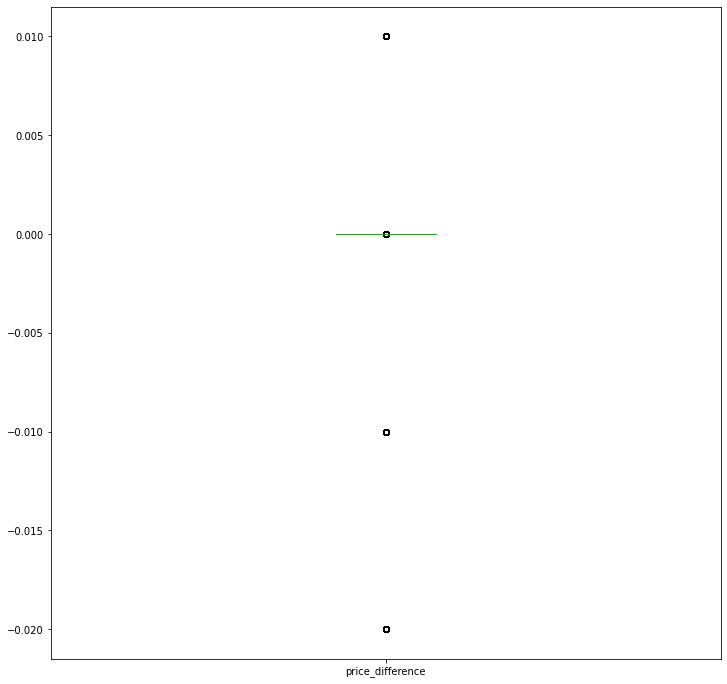

In [311]:
price_difference_new.boxplot("price_difference",   figsize=(12,12), grid=False)

Save the data once you are sure you can trust it!

In [312]:
#run the code only once your "orderlines" and "orders" are clean
orderlines.to_csv('orderlines_clean.csv', index=False)
orders.to_csv('orders_clean.csv', index=False)

from google.colab import files
files.download("orderlines_clean.csv")
files.download("orders_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Challenge: Cleaning products

Now it is time to clean the products dataset. Let's do a quick review of its major problems: 

In [313]:
print(products.info(), "\n")
print("Missing values:", products.isna().sum(), "\n")
print("Duplicate rows:", products.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB
None 

Missing values: sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64 

Duplicate rows: 8746


Looking at this overview, we can see that there are different things that have to be changed: 

* Data types: 
    * `price` should be a float
    * `promo price` should be a float
* Duplicated rows. They have to be removed. 
    * To accomplish this step you can use the method `pd.DataFrame.drop_duplicates()`. Be sure you drop all the duplicates based on the column **sku**, as it is the one you will use to merge with orderlines. 
* Missing values: 
    * Description maybe can be inferred by the name
    * `price`. Is there a way we can extract the information from another table?
    * `type`. Do we need this column for our analysis?
    
This task can be accomoplished by using all the methods you already know.

### Start of the challenge

#### Duplicates

In [314]:
products_temp = products.drop_duplicates('sku').copy()
products_temp.info()
print(products.info())
print(products.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10579 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10579 non-null  object
 1   name         10579 non-null  object
 2   desc         10572 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10579 non-null  object
 5   in_stock     10579 non-null  int64 
 6   type         10529 non-null  object
dtypes: int64(1), object(6)
memory usage: 661.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  o

In [315]:
19326-10579

8747

#### Fix data types

In [316]:
products_temp.sample(10)

,sku,name,desc,price,promo_price,in_stock,type
10973,GRT0388,Griffin Survivor Case Tough Journey iPhone 6 /...,Thin casing absorbs impact iPhone 6 / 6s.,29.99,129.906,0,11865403
12855,WIT0030,Monitor activity Withings Go Black,Activity Monitor E-ink screen for iPhone and iPod,49.95,449.902,0,11905404
17333,APP2461,Apple Watch the 1st Gen. 38mm Case Stainless s...,Apple Watch the 1st gene. touch screen monitor...,869,3.890.005,0,24885185
17198,OWC0194-4,Mac OWC Memory 32GB (4x8GB) 1866MHz DIMM,RAM 32GB (4x8GB) Mac Pro 2013.,475.96,4.629.896,1,1364
2252,GRT0366,Adidas armband Griffin iPhone 6 / 6S Black / Red,Bracelet sport and activity screensaver for iP...,29.99,264.905,0,5405
15989,PAC1980,Synology DS1817 + | 16GB RAM | 24TB (8x3TB) Se...,NAS server with 16GB of RAM and 24TB for Mac a...,22.777.892,19.057.464,0,12175397
16911,APP2182,Apple Pencil Case Blue Night,Carrying case with leather material for Apple ...,35,350.005,0,5403
11279,PHI0063,Philips Hue White Single Bulb E27 9.5W A60,White bulb High quality and comfortable regula...,19.95,189.897,1,11905404
810,MOP0033,Mophie Juice Pack Helium (1500mAh) battery cov...,IPhone Battery Case SE / 5s / 5 plastic and me...,79.99,62.989,0,"5,49E+11"
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696


In [317]:
# create a new column with the amount of dots in the unit_price column
products_temp['dots_price'] = products_temp['price'].str.count('\.') # the backslash 'escapes' the special meaning of '.' in string operations
products_temp['dots_promo_price'] = products_temp['price'].str.count('\.') # the backslash 'escapes' the special meaning of '.' in string operations
# Replace all missing values by '000.000'
products_temp = products_temp.assign(price = products_temp['price'].fillna('000.000'))
products_temp[products_temp['price'] == '000.000']

products_temp

,sku,name,desc,price,promo_price,in_stock,type,dots_price,dots_promo_price
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,1.00,1.00
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401,0.00,0.00
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387,0.00,0.00
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230,0.00,0.00
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,1.00,1.00
...,...,...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282,1.00,1.00
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,1.00,1.00
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392,1.00,1.00
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392,1.00,1.00


In [318]:
# split the price
products_temp = products_temp.assign(price_split = products_temp['price'].str.split('\.'))
products_temp.head()

,sku,name,desc,price,promo_price,in_stock,type,dots_price,dots_promo_price,price_split
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,1.00,1.00,"[59, 99]"
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401,0.00,0.00,[59]
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387,0.00,0.00,[59]
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230,0.00,0.00,[25]
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,1.00,1.00,"[34, 99]"


In [319]:
need_check = []
len_split = []
for val in products_temp['price_split']:    
    len_split.append(len(val))
    if len(val[-1]) > 2: 
        need_check.append(True)
    else:
        need_check.append(False)

In [320]:
products_temp = products_temp.assign(need_check = need_check, len_split = len_split)
products_temp.loc[(products_temp.need_check==True) & (products_temp.len_split > 1) & (products_temp.dots_price != 0), 'price'] = 'Null'

In [321]:
# errors=coerce sets all none numerical values to NaN
products_temp['price'] = pd.to_numeric(products_temp['price'], errors='coerce')
products_temp.query('need_check==True & len_split > 1 & dots_price != 0').head(10)

,sku,name,desc,price,promo_price,in_stock,type,dots_price,dots_promo_price,price_split,need_check,len_split
34,TWS0019,Twelve South MagicWand support Apple Magic Tra...,MagicWand for wireless keyboard and Magic Trac...,NaN,299.899,0,8696,NaN,NaN,"[000, 000]",True,2
362,REP0043,Speaker lower repair iPhone 4,Repair service including parts and labor for i...,NaN,499.004,0,"1,44E+11",1.00,1.00,"[499, 004]",True,2
480,PIE0011,Internal Battery for iPhone 3G,Replacement AC Adapter for Apple iPhone 3G.,NaN,98.978,0,21485407,1.00,1.00,"[98, 978]",True,2
515,SEN0061,Sennheiser EZX 80 Handsfree iPhone iPad and iP...,IPhone bluetooth headset with microphone iPad ...,NaN,649.891,0,5384,1.00,1.00,"[649, 891]",True,2
518,SEV0026,Service installation RAM + HDD + SSD MacBook /...,RAM + HDD installation + SSD in your MacBook /...,NaN,599.918,0,20642062,1.00,1.00,"[599, 918]",True,2
525,SEV0024,Service installation RAM + HDD + SSD Mac mini,installation RAM HDD + SSD + on your Mac mini ...,NaN,599.918,0,20642062,1.00,1.00,"[599, 918]",True,2
526,SEV0025,Service installation RAM + HDD + SSD iMac,installation RAM HDD + SSD + on your iMac + Da...,NaN,599.918,0,20642062,1.00,1.00,"[599, 918]",True,2
528,SEV0027,Budget Request repair Apple MacBook Air,diagnosis to repair MacBook Air.,NaN,199.892,0,"1,46E+11",1.00,1.00,"[199, 892]",True,2
532,PAC0362,"NewerTech pack 2 cups 225 ""for iMac",Two suction pads 225 inches for aluminum iMac.,NaN,169.896,1,14305406,1.00,1.00,"[199, 795]",True,2
536,SEV0028,Budget Request repair Apple MacBook Pro,diagnosis to repair MacBook Pro.,NaN,199.892,0,"1,46E+11",1.00,1.00,"[199, 892]",True,2


In [322]:
products_temp.drop(['price_split','need_check','len_split','dots_price'], axis=1, inplace=True)

#### Missing values

In [323]:
products = products_temp.copy()

In [325]:
(
products.assign(row_na = products.isna().sum(axis=1) > 0)
.query('row_na == True')
)

,sku,name,desc,price,promo_price,in_stock,type,dots_promo_price,row_na
34,TWS0019,Twelve South MagicWand support Apple Magic Tra...,MagicWand for wireless keyboard and Magic Trac...,NaN,299.899,0,8696,NaN,True
307,SAN0017,SanDisk Cruzer Edge USB 2.0 Flash Drive 16GB,Pendrive USB 2.0 Mac and PC.,8.00,59.895,0,NaN,0.00,True
362,REP0043,Speaker lower repair iPhone 4,Repair service including parts and labor for i...,NaN,499.004,0,"1,44E+11",1.00,True
480,PIE0011,Internal Battery for iPhone 3G,Replacement AC Adapter for Apple iPhone 3G.,NaN,98.978,0,21485407,1.00,True
515,SEN0061,Sennheiser EZX 80 Handsfree iPhone iPad and iP...,IPhone bluetooth headset with microphone iPad ...,NaN,649.891,0,5384,1.00,True
518,SEV0026,Service installation RAM + HDD + SSD MacBook /...,RAM + HDD installation + SSD in your MacBook /...,NaN,599.918,0,20642062,1.00,True
525,SEV0024,Service installation RAM + HDD + SSD Mac mini,installation RAM HDD + SSD + on your Mac mini ...,NaN,599.918,0,20642062,1.00,True
526,SEV0025,Service installation RAM + HDD + SSD iMac,installation RAM HDD + SSD + on your iMac + Da...,NaN,599.918,0,20642062,1.00,True
528,SEV0027,Budget Request repair Apple MacBook Air,diagnosis to repair MacBook Air.,NaN,199.892,0,"1,46E+11",1.00,True
530,SAN0026,SanDisk Extreme Cruzer 16GB USB 3.0 Flash Drive,USB 3.0 flash drive 16GB USB Mac and PC.,22.00,209.935,0,NaN,0.00,True


In [326]:
prod_na = products.loc[products.isna().sum(axis=1) > 0,:].copy()
prod_na.head()

,sku,name,desc,price,promo_price,in_stock,type,dots_promo_price
34,TWS0019,Twelve South MagicWand support Apple Magic Tra...,MagicWand for wireless keyboard and Magic Trac...,NaN,299.899,0,8696,NaN
307,SAN0017,SanDisk Cruzer Edge USB 2.0 Flash Drive 16GB,Pendrive USB 2.0 Mac and PC.,8.00,59.895,0,NaN,0.00
362,REP0043,Speaker lower repair iPhone 4,Repair service including parts and labor for i...,NaN,499.004,0,"1,44E+11",1.00
480,PIE0011,Internal Battery for iPhone 3G,Replacement AC Adapter for Apple iPhone 3G.,NaN,98.978,0,21485407,1.00
515,SEN0061,Sennheiser EZX 80 Handsfree iPhone iPad and iP...,IPhone bluetooth headset with microphone iPad ...,NaN,649.891,0,5384,1.00


In [327]:
orderlines.shape[0]

293743

In [328]:
# Orders with products with missing prices on products dataset
orderlines.loc[orderlines['sku'].isin(prod_na['sku']),:].shape[0] / orderlines.shape[0]

0.025604014393534484

In [329]:
# this is interesting, as for the products data it is much smaller
prod_na.shape[0] / products.shape[0]

0.06040268456375839

In [330]:
orderlines.loc[orderlines['sku'].isin(prod_na['sku']),:]['total_price'].sum() / orderlines['total_price'].sum()

0.027227081578374515

In [331]:
products.drop(['promo_price','in_stock'], axis=1).to_csv('products_cl.csv', index=False)
files.download("products_cl.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [332]:
# code here

## Brands

The brands csv looks fine, so we can work together with it. 

In [333]:
#brands.to_csv('brands_clean.csv', index=False)
#files.download("brands_clean.csv")